<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Nyungwe_tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visit to the national parks with products

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# accessing drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_pro=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Consolidated database ( national parks) with prices.xlsx')
df_pro.head()

,Park,Year,Month,Product,Visitors,price,Primates,Trails,Camping,Canopy,Birding,Game Safari,Camping.1,Boat ride,Behind Scene,Fishing & Other,Gorillas,Mountain climbing,Dian Fossey's Tomb,Golden Monkey,Nature Walk,caves,t,January,February,March,April,May,June,July,August,September,October,November,December,covid-19,Unnamed: 36
0,Nyungwe,2009,January,Primates,175,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,Nyungwe,2009,February,Primates,170,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Nyungwe,2009,March,Primates,91,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
3,Nyungwe,2009,April,Primates,69,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
4,Nyungwe,2009,May,Primates,158,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN


In [4]:
df_pro.columns

Index(['Park ', 'Year', 'Month ', 'Product', 'Visitors', 'price', 'Primates',
       'Trails', 'Camping', 'Canopy', 'Birding', 'Game Safari', 'Camping.1',
       'Boat ride', 'Behind Scene', 'Fishing & Other ', 'Gorillas',
       'Mountain climbing', 'Dian Fossey's Tomb', 'Golden Monkey',
       'Nature Walk', 'caves', 't', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'covid-19', 'Unnamed: 36'],
      dtype='object')

In [5]:
df=df_pro[['Park ', 'Year', 'Month ', 'Product', 'Visitors', 'price','covid-19']]
df.head()

,Park,Year,Month,Product,Visitors,price,covid-19
0,Nyungwe,2009,January,Primates,175,60,0
1,Nyungwe,2009,February,Primates,170,60,0
2,Nyungwe,2009,March,Primates,91,60,0
3,Nyungwe,2009,April,Primates,69,60,0
4,Nyungwe,2009,May,Primates,158,60,0


In [6]:
df.isnull().sum()

Park        0
Year        0
Month       0
Product     0
Visitors    0
price       0
covid-19    0
dtype: int64

In [7]:
data = df.rename(columns = {'Month ': 'Month', 'Park ': 'Park'}, inplace = False)

In [8]:
data=data.replace(to_replace={'Month': {"Septepmber":"September","April ":"April", "March ":"March"}}, value=None)

In [9]:
data=data.replace(to_replace={'Product': {"nature Walk":"Nature Walk","caves":"Caves"}}, value=None)

In [10]:
data.head()

,Park,Year,Month,Product,Visitors,price,covid-19
0,Nyungwe,2009,January,Primates,175,60,0
1,Nyungwe,2009,February,Primates,170,60,0
2,Nyungwe,2009,March,Primates,91,60,0
3,Nyungwe,2009,April,Primates,69,60,0
4,Nyungwe,2009,May,Primates,158,60,0


In [11]:
# # groupby
# # grouping total_amount by year, month, week, drugs, and districts
# df_grouped= data.groupby(['Year','Month','Park','Product']).agg(date=('Year','first'),
#                                                               number=('Number of visitors ',np.sum)
#                                                               ).reset_index().sort_values('date')

In [12]:
# df_grouped

In [13]:
tours_data=data
tours_data['Year'] = tours_data['Year'].astype(str)
tours_data['date'] = tours_data['Month'] + '-' + tours_data['Year']
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,0,January-2009
1,Nyungwe,2009,February,Primates,170,60,0,February-2009
2,Nyungwe,2009,March,Primates,91,60,0,March-2009
3,Nyungwe,2009,April,Primates,69,60,0,April-2009
4,Nyungwe,2009,May,Primates,158,60,0,May-2009


In [14]:
# replacing written error in september 2021
# tours_data.replace(to_replace = "Septepmber-2021", value ="September-2021", inplace=True)

In [15]:
# transforming date from string to date format
tours_data['date']=pd.to_datetime(tours_data['date'])
# transforming date from float to integer
tours_data['Visitors'] = tours_data['Visitors'].astype(int)
tours_data['covid-19'] = tours_data['covid-19'].astype(bool)
tours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      2436 non-null   object        
 1   Year      2436 non-null   object        
 2   Month     2436 non-null   object        
 3   Product   2436 non-null   object        
 4   Visitors  2436 non-null   int64         
 5   price     2436 non-null   int64         
 6   covid-19  2436 non-null   bool          
 7   date      2436 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 135.7+ KB


In [16]:
# Time Range 
tours_data["date"].min(), tours_data["date"].max(), tours_data["Visitors"].min(), tours_data["Visitors"].max()

(Timestamp('2009-01-01 00:00:00'), Timestamp('2021-09-01 00:00:00'), 0, 6474)

In [17]:
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,False,2009-01-01
1,Nyungwe,2009,February,Primates,170,60,False,2009-02-01
2,Nyungwe,2009,March,Primates,91,60,False,2009-03-01
3,Nyungwe,2009,April,Primates,69,60,False,2009-04-01
4,Nyungwe,2009,May,Primates,158,60,False,2009-05-01


In [18]:
# Dataframe must be sorted by date because of Time Series Split 
df1 = tours_data.sort_values("date")

# to split test and train 
train = df1.loc[(df1["date"] < "2018-09-01"), :]
test = df1.loc[(df1["date"] >= "2018-09-01"), :]
train.shape, test.shape

((1844, 8), (592, 8))

In [19]:
# (561/1896)*100
(test.shape[0]/train.shape[0])*100

32.10412147505423

In [20]:
train.describe()

,Visitors,price
count,1844.000000,1844.000000
mean,353.585683,147.060738
std,712.757111,351.198838
min,0.000000,20.000000
25%,16.000000,45.000000
50%,100.000000,50.000000
75%,254.000000,75.000000
max,6474.000000,1500.000000


In [21]:
test.describe()

,Visitors,price
count,592.000000,592.000000
mean,347.047297,158.673986
std,783.204207,347.821074
min,0.000000,20.000000
25%,14.750000,45.000000
50%,86.500000,72.500000
75%,314.250000,95.000000
max,6462.000000,1500.000000


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 595
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      1844 non-null   object        
 1   Year      1844 non-null   object        
 2   Month     1844 non-null   object        
 3   Product   1844 non-null   object        
 4   Visitors  1844 non-null   int64         
 5   price     1844 non-null   int64         
 6   covid-19  1844 non-null   bool          
 7   date      1844 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 117.1+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1333 to 2435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      592 non-null    object        
 1   Year      592 non-null    object        
 2   Month     592 non-null    object        
 3   Product   592 non-null    object        
 4   Visitors  592 non-null    int64         
 5   price     592 non-null    int64         
 6   covid-19  592 non-null    bool          
 7   date      592 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 37.6+ KB


In [24]:
train['Product'].value_counts()

Camping               244
Gorillas              116
Canopy                116
Trails                116
Dian Fossey's Tomb    116
Behind Scene          116
Primates              116
Caves                 116
Game Safari           116
Golden Monkey         116
Mountain climbing     116
Nature Walk           116
Fishing & Other       116
Birding               116
Boat ride              92
Name: Product, dtype: int64

In [25]:
test['Product'].value_counts()

Camping               74
Game Safari           37
Nature Walk           37
Mountain climbing     37
Fishing & Other       37
Gorillas              37
Golden Monkey         37
Canopy                37
Trails                37
Dian Fossey's Tomb    37
Behind Scene          37
Primates              37
Caves                 37
Boat ride             37
Birding               37
Name: Product, dtype: int64

In [26]:
train['Month'].value_counts()

February     159
April        159
August       159
March        159
May          159
January      159
June         159
July         159
October      143
December     143
September    143
November     143
Name: Month, dtype: int64

In [27]:
test['Month'].value_counts()

September    64
February     48
April        48
October      48
August       48
March        48
May          48
December     48
November     48
June         48
January      48
July         48
Name: Month, dtype: int64

Descriptive statistics

In [28]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Park'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Park,
Akagera,405124
Volcanoes,328737
Nyungwe,123603


In [29]:
#different aggregate by Month
table = pd.pivot_table(tours_data,index=['Month'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Month,
July,107141
August,104220
June,83020
December,75204
September,75125
January,72395
February,68166
October,67025
March,58257


In [30]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Product'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Product,
Game Safari,359098
Gorillas,223063
Golden Monkey,51022
Canopy,49786
Primates,34492
Trails,32917
Mountain climbing,32579
Camping,25930
Boat ride,21446


Visualizations

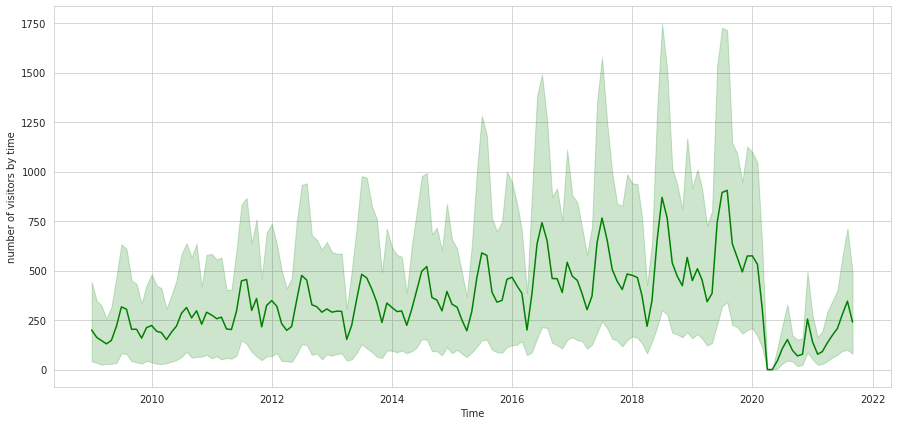

In [31]:
#Let's have a look at number of visitors by date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'Visitors', data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

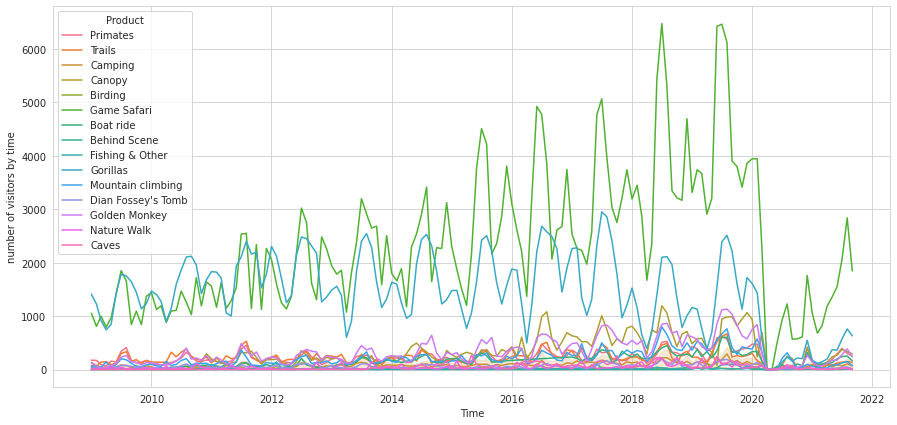

In [32]:
#Let's have a look at number of visitors by product
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'Visitors', hue='Product',data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

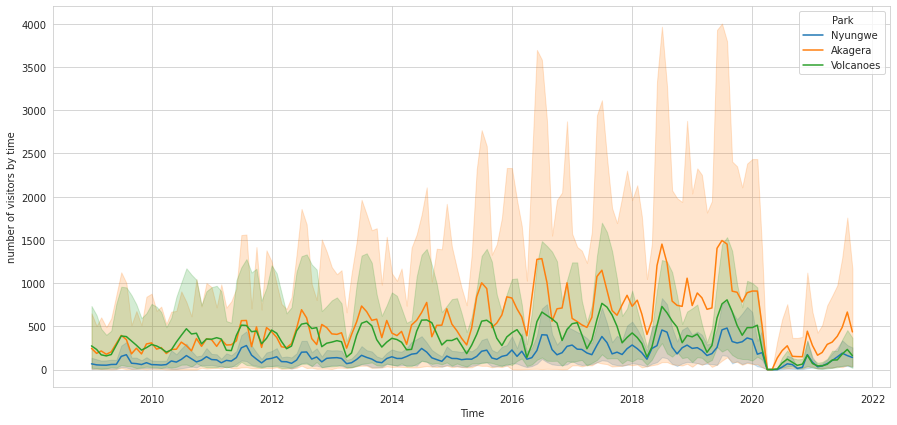

In [33]:
#Let's have a look at number of visitors by park
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'Visitors', hue='Park',data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

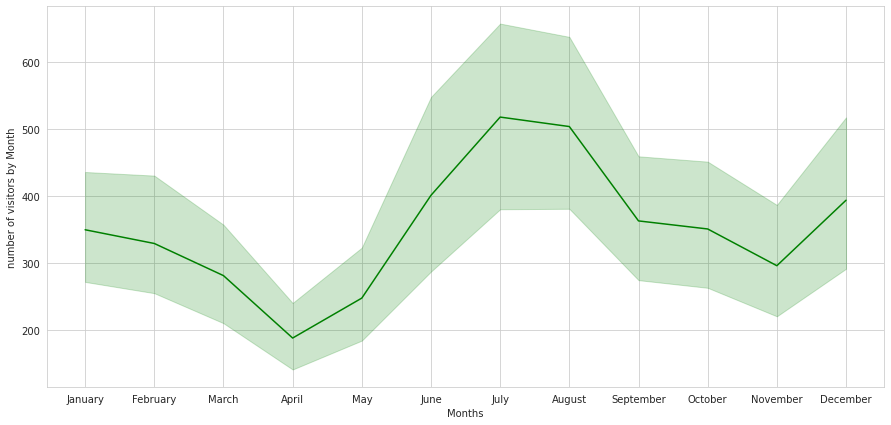

In [34]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month', y = 'Visitors', data = tours_data, color='green')
plt.xlabel('Months')
plt.ylabel('number of visitors by Month')
display()


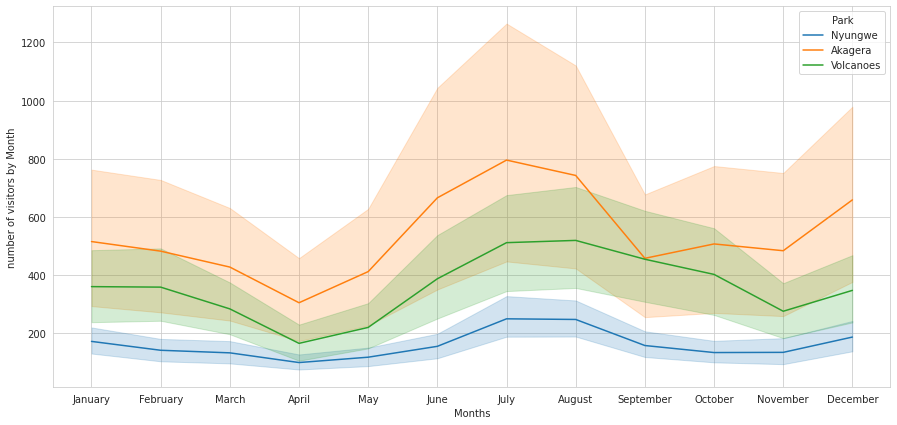

In [35]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month', y = 'Visitors', hue='Park', data = tours_data, color='green')
plt.xlabel('Months')
plt.ylabel('number of visitors by Month')
display()


In [36]:
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,False,2009-01-01
1,Nyungwe,2009,February,Primates,170,60,False,2009-02-01
2,Nyungwe,2009,March,Primates,91,60,False,2009-03-01
3,Nyungwe,2009,April,Primates,69,60,False,2009-04-01
4,Nyungwe,2009,May,Primates,158,60,False,2009-05-01


# Model for product *data*

In [85]:
train_ny=train[train['Park']=='Nyungwe']

# Train

In [86]:
#Add a trend component to our timeseres with drugs added
train_ny['trend']= range(train_ny.shape[0])
# change month column to category for onehot encoding process
train_ny['covid-19']=train_ny['covid-19'].astype('category')
train_ny['Month']=train_ny['Month'].astype('category')
train_ny['Park']=train_ny['Park'].astype('category')
train_ny['Product']=train_ny['Product'].astype('category')
# dropping columns not required in model
X= train_ny.drop(['date','Visitors','Year','Park'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= train_ny.Visitors.values
# y=np.log(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# Test

In [87]:
test_ny=test[test['Park']=='Nyungwe']

In [88]:
#Add a trend component to our timeseres with drugs added
test_ny['trend']= range(test_ny.shape[0])
# change month column to category for onehot encoding process
test_ny['covid-19']=test_ny['covid-19'].astype('category')
test_ny['Month']=test_ny['Month'].astype('category')
test_ny['Park']=test_ny['Park'].astype('category')
test_ny['Product']=test_ny['Product'].astype('category')

# dropping columns not required in model
X_test= test_ny.drop(['date','Visitors','Year','Park'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= test_ny.Visitors.values

# y_test=np.log(y_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [89]:
X.shape

(580, 31)

In [90]:
X_test.shape

(185, 31)

In [91]:

names

Index(['price', 'trend', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Product_Behind Scene', 'Product_Birding',
       'Product_Boat ride', 'Product_Camping', 'Product_Canopy',
       'Product_Caves', 'Product_Dian Fossey's Tomb',
       'Product_Fishing & Other ', 'Product_Game Safari',
       'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'covid-19_False', 'covid-19_True'],
      dtype='object')

In [92]:
names_test

Index(['price', 'trend', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Product_Behind Scene', 'Product_Birding',
       'Product_Boat ride', 'Product_Camping', 'Product_Canopy',
       'Product_Caves', 'Product_Dian Fossey's Tomb',
       'Product_Fishing & Other ', 'Product_Game Safari',
       'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'covid-19_False', 'covid-19_True'],
      dtype='object')

Libraries

In [60]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

Linear regression

In [93]:
# linear regression
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)
r_score_train=r2_score(y,prediction)
print('r score of train {}'.format(r_score_train))

# test Prediction by model
pred_test= model.predict(X_test)
mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
r_score_test=r2_score(y_test,pred_test)
print('Mean square error test: ', mse_test)
print('r score of test {}'.format(r_score_test))
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)


Mean square error train:  111.28141039245568
r score of train 0.5961484672608567
Mean square error test:  216.96389603171826
r score of test 0.1644186429387665
Mean square error difference between train and test:  -105.68248563926258


In [94]:
model.coef_

array([ 4.49850749e+00,  3.26787303e-01, -4.77222910e+01,  9.06019629e+01,
        1.05872486e+00, -1.26944180e+01,  6.95951854e+00,  9.82758995e+01,
        4.38983597e+00, -2.54083545e+01, -3.11962275e+01, -4.26851164e+01,
       -3.11400688e+01, -1.04394656e+01, -1.42108547e-14, -1.39395043e+02,
        7.10542736e-15, -4.17204751e+01,  9.41638321e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.00677485e+01,
        1.17019434e+02,  0.00000000e+00,  0.00000000e+00])

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=6000,max_depth=8, max_features=8, min_samples_leaf=4,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

mean square error of train 73.05206376506587
mean square error of test 225.6318506017813
r score of train 0.8259630466922029
r score of test0.09632012466461404


In [96]:
regr.feature_importances_

array([0.21412491, 0.2770506 , 0.00599115, 0.0346419 , 0.00195904,
       0.0012665 , 0.0016102 , 0.0369874 , 0.00213875, 0.00249412,
       0.00300207, 0.00342864, 0.00195599, 0.0012549 , 0.        ,
       0.11193476, 0.        , 0.08990346, 0.10758666, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03026985, 0.07239911, 0.        ,
       0.        ])

In [97]:
# Feature Importance of logistic regression
from matplotlib import pyplot
importance = regr.feature_importances_
# odds=np.exp(importance)
# summarize feature importance
feature_importances=pd.DataFrame({'features':names,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
1,trend,0.277051
0,price,0.214125
15,Product_Birding,0.111935
18,Product_Canopy,0.107587
17,Product_Camping,0.089903
28,Product_Trails,0.072399
7,Month_July,0.036987
3,Month_August,0.034642
27,Product_Primates,0.030270
2,Month_April,0.005991


In [99]:
# Save submission file
feature_importances.to_csv('feature_importances_nyungwe.csv')
files.download('feature_importances_nyungwe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

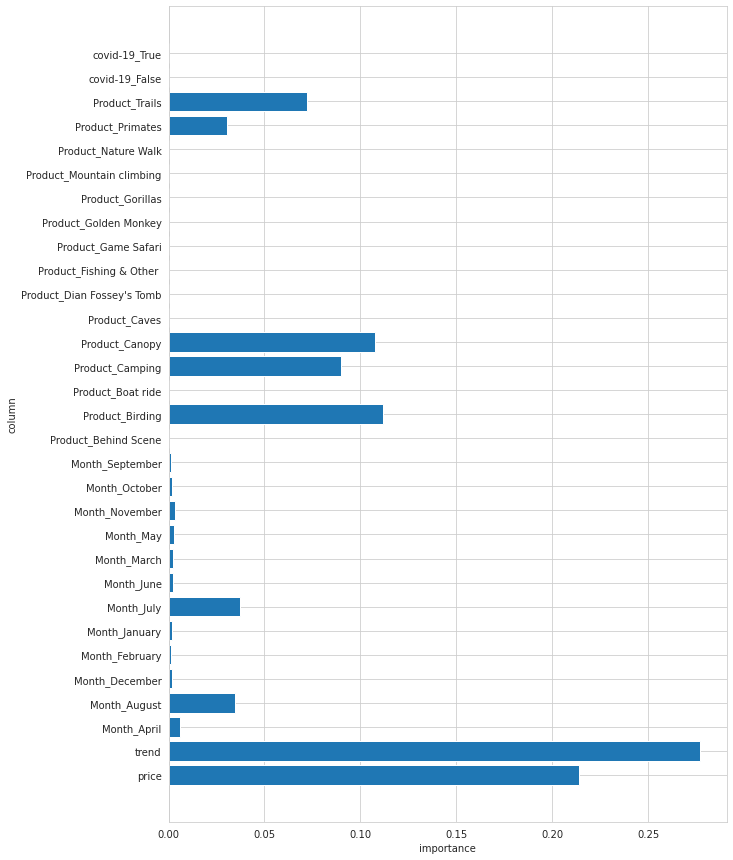

In [100]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()